In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
len(train)

891

# Analiza danych

<AxesSubplot:xlabel='Sex', ylabel='count'>

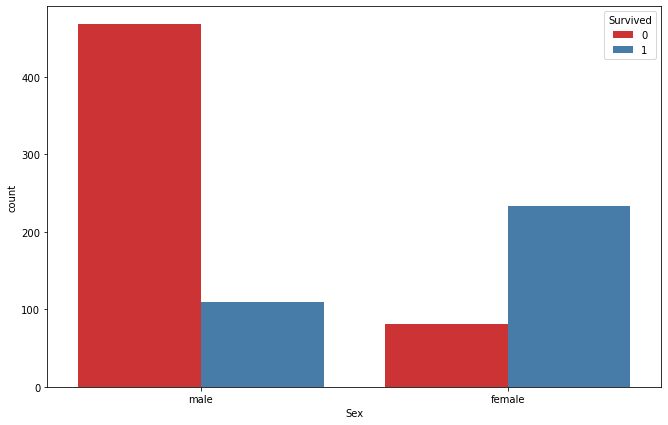

In [7]:
plt.figure(figsize=(11,7))
sns.countplot(x='Sex',hue='Survived',data=train,palette='Set1')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

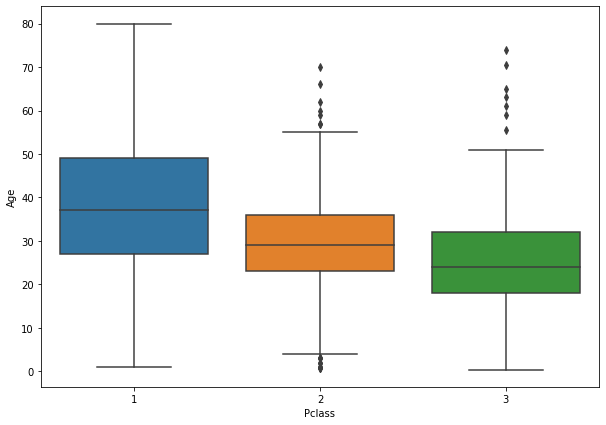

In [8]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

# Czyszczenie danych

In [9]:
#train[train['Name'].str.contains('Mrs.|Mr.|Miss.|Master.|Ms.|Rev.|Major.|Dr.| the |Capt.|Col.|Mlle.|Mme.|Don.|Jonkheer.')==False]

In [10]:
train['Privileged'] = ''

In [11]:
train.loc[train['Name'].str.contains('Rev.|Major.|Dr.| the |Capt.|Col.|Mlle.|Mme.|Don.|Jonkheer.')==True, ['Privileged']] = 1

In [12]:
train['Privileged'] = train['Privileged'].apply(lambda x: x if x==1 else 0)

In [13]:
def impute_age(cols):
    Age = cols[0] #pierwszy element
    Pclass = cols[1] #drugi element
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37            
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [14]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

In [15]:
train.info()
# Name, Sex, Ticket, Cabin, Embarked - kategorialne

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Privileged   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [16]:
train['Male'] = train['Sex'].apply(lambda x: 0 if x=="female" else 1)

In [17]:
train.drop(columns=['Name','Sex','Ticket','Cabin','PassengerId'], inplace=True)

In [18]:
embarked = pd.get_dummies(train['Embarked'],drop_first=True)

In [19]:
train = pd.concat([train, embarked], axis=1)

In [20]:
train.drop(columns='Embarked', inplace=True)

In [21]:
train[train.isna().any(axis=1)]

,Survived,Pclass,Age,SibSp,Parch,Fare,Privileged,Male,Q,S


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Privileged  891 non-null    int64  
 7   Male        891 non-null    int64  
 8   Q           891 non-null    uint8  
 9   S           891 non-null    uint8  
dtypes: float64(2), int64(6), uint8(2)
memory usage: 57.6 KB


# Model

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = train.drop('Survived',axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Drzewo decyzyjne

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [26]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
predictions = dtree.predict(X_test)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       154
           1       0.77      0.67      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [30]:
print(confusion_matrix(y_test,predictions))

[[131  23]
 [ 38  76]]


# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)

In [32]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [33]:
predictions = rfc.predict(X_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       154
           1       0.81      0.75      0.78       114

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



In [36]:
print(confusion_matrix(y_test,predictions))

[[134  20]
 [ 29  85]]


# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lg = LogisticRegression(max_iter=5000)

In [39]:
lg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [40]:
predictions = lg.predict(X_test)

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.80      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [42]:
print(confusion_matrix(y_test,predictions))

[[135  19]
 [ 37  77]]


# Testowanie

In [43]:
test = pd.read_csv('test.csv')

In [44]:
test.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [45]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [46]:
test['Privileged'] = ''
test.loc[test['Name'].str.contains('Rev.|Major.|Dr.| the |Capt.|Col.|Mlle.|Mme.|Don.|Jonkheer.')==True, ['Privileged']] = 1
test['Privileged'] = test['Privileged'].apply(lambda x: x if x==1 else 0)

def impute_age(cols):
    Age = cols[0] #pierwszy element
    Pclass = cols[1] #drugi element
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37            
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

test['Age'] = test[['Age','Pclass']].apply(impute_age, axis=1)
test['Male'] = test['Sex'].apply(lambda x: 0 if x=="female" else 1)
test.drop(columns=['Name','Sex','Ticket','Cabin'], inplace=True)
test.fillna(np.mean(test['Fare']),inplace=True)
embarked = pd.get_dummies(test['Embarked'],drop_first=True)
test = pd.concat([test, embarked], axis=1)
test.drop(columns='Embarked', inplace=True)

In [47]:
predictions = rfc.predict(test.drop(columns='PassengerId'))

In [48]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

In [49]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
